# Logistic Regression

## Linear Regression Vs Logistic Regression

To understand why we use logistic regression over linear regression, let's take an example where we predict the chances of heart disease based on cholesterol levels.

| Cholesterol Level | Has Heart Disease (1 = Yes, 0 = No) |
|-------------------|------------------------------------|
| 180               | 0                                  |
| 170               | 0                                  |
| 200               | 0                                  |
| 220               | 1                                  |
| 225               | 1                                  |
| 245               | 1                                  |

Let's take a look at how cholesterol levels relate to heart disease using linear regression. The graph below shows the relationship between cholesterol levels and whether someone has heart disease:  
![Cholestrol Vs Heart Disease Using Linear Regression](images/Cholestrol_Vs_Heart_Disease_LR.png)

The red line is the best-fit line that linear regression generates. The green dotted line represents a threshold where the predicted probability equals 0.5. This threshold helps us decide: cholesterol levels to the left of the green line (lower levels) are predicted to not result in heart disease (0), while levels to the right (higher levels) are more likely to lead to heart disease (1).

Linear regression fits the original data well, and the predicted outcomes align accurately. However, if we introduce more data points, such as a cholesterol level of 300 and beyond for individuals with heart disease (denoted by 1), the best-fit line changes significantly.

Let's include these new data points and observe the effect on the model:  
![Cholestrol Vs Heart Disease Using Linear Regression](images/Cholestrol_Vs_Heart_Disease_New_Data_LR.png)

From the above graph, we can see that by adding these new, more extreme data points, the threshold point shifts where the predicted probability of heart disease crosses 0.5. This observation leads us to conclude that using linear regression for classification tasks, especially in the presence of unbalanced data points, is not recommended. 

Let's see how we can introduce logistic regression to tackle this problem. Unlike linear regression, which predicts continuous outcomes, logistic regression is designed for binary classification tasks. It estimates the probability that a given input belongs to a particular category—in this case, the likelihood of having heart disease based on cholesterol levels.

---
---

## Logistic Regression

Logistic regression is a statistical model primarily used for binary classification tasks, where the objective is to predict one of two possible outcomes, typically denoted as 0 (no) or 1 (yes). This model is particularly useful in scenarios such as determining whether a patient has a disease based on various medical measurements or predicting whether a customer will purchase a product based on their browsing behavior.

## Sigmoid Function

In logistic regression, instead of drawing a linear best-fit line, we "squash" the linear line at both ends, making the model more suitable for binary classification. This is achieved by using the sigmoid function. 

In the graph below, we can see that our model is given more accurate results with the introduction of a sigmoid function.
![Cholestrol Vs Heart Disease Using Logistic Regression](images/Cholesterol_Vs_Heart_Disease_Logistic_Regression.png)

The mathematical representation of the sigmoid function is:

$$
\text{sigmoid}(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- **z** represents the linear combination of the input features and their weights $(i.e., z = \theta_0 + \theta_1 x )$.
- **e** is the Euler's value which is approximately 2.71828.

In the above equation, we are dividing 1 by a number which is sightly more than 1 and hence the result is less than one.The sigmoid function ensures that the output is always a value between 0 and 1, making it suitable for probability estimation.

By substituting the value of z, into the sigmoid function, we obtain the logistic regression hypothesis:

$$
h_\theta(x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x)}}
$$

Here:
- $h_\theta(x)$ is the predicted probability that the outcome is 1 (i.e., the event occurs).
- $\theta_0$ is the intercept.
- $\theta_1$ is the slope of the line.

This formula allows us to map any real-valued input to a value between 0 and 1, which represents the predicted probability of the binary outcome.

---

## Cost Function in Linear Regression

In linear regression, the cost function is defined as:

$$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i)^2 $$

Where:  
- $h_\theta(x)$ is the predicted outcome at that particular point in our model, calculated using a linear function $(i.e., z = \theta_0 + \theta_1 x )$.
- $y_i$ represents the actual observed value.
- $m$ is the number of training examples.

In the context of logistic regression, however, the model predicts probabilities using the sigmoid function:

$$ h_\theta(x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x)}} $$

This predicted outcome $h_\theta(x)$ is bounded between 0 and 1, making it suitable for binary classification tasks.

### Limitations of Using the Linear Cost Function in Logistic Regression

#### Let's Understand with a Simple Example

Let’s say we have the following data:

| Hours Studied | Pass (1) / Fail (0) |
|---------------|---------------------|
| 1 hour        | 0 (Fail)            |
| 2 hours       | 0 (Fail)            |
| 5 hours       | 1 (Pass)            |
| 6 hours       | 1 (Pass)            |

If we use linear regression and predict:

- A student studying 1 hour might get a prediction of 0.2 (which means they're 20% likely to pass, but the actual outcome is 0, fail).
- A student studying 6 hours might get a prediction of 1.1 (which is not possible since the probability can’t be greater than 1, but the actual outcome is 1, pass).

If we use the same approach in logistic regression, let’s see what will be the result:

- For the student studying 1 hour (actual fail, 0), if we predict 0.2, the squared error is (0 - 0.2)² = 0.04.
- For the student studying 6 hours (actual pass, 1), if we predict 1.1, the squared error is (1 - 1.1)² = 0.01.

But in binary classification, predicting 0.2 for someone who is actually a 0 (fail) isn't the same kind of mistake as predicting 1.1 for someone who should have a 1 (pass). MSE doesn’t capture the difference between these errors. It's symmetric and treats both errors equally.

In binary classification, the model should penalize large errors differently:
- Predicting 0.9 when the actual class is 0 (big error) should be heavily penalized.
- Predicting 0.2 when the actual class is 0 (small error) is less bad.

Mean squared error doesn’t handle this asymmetry. It treats both errors as similarly "bad." This can lead to poor model performance because it doesn’t properly emphasize the difference between "almost correct" and "way off."

---

## The Logistic Regression Cost Function

To fix the limitations of the linear cost function for binary classification, we need a new approach. Instead of using the Mean Squared Error (MSE), which doesn't handle the asymmetry of classification errors well, logistic regression introduces a more suitable cost function called the log-loss or cross-entropy loss.

### The Mathematical Representation of the Cost Function

The log-loss cost function for logistic regression looks like this:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

Where:
- $h_\theta(x^{(i)})$ is the predicted outcome.
- $y^{(i)}$ is the actual value or outcome.
- $m$ is the length of data

### Breaking It Down

The cost function treats cases where y = 1 and y = 0 separately, using logarithms to ensure the penalty for mistakes grows larger as the model becomes more confident in its incorrect prediction.

#### Case 1: When y = 1
- The cost is $-\log(h_\theta(x)) $.
- If the model predicts a probability $h_\theta(x)$ close to 1, the cost is small (close to 0).
- If $h_\theta(x)$ is far from 1 (e.g., 0.1), the cost becomes very large.

#### Case 2: When y = 0
- The cost is $-\log(1 - h_\theta(x))$.
- If the model predicts a probability $h_\theta(x)$ close to 0, the cost is small.
- If $h_\theta(x)$ is far from 0 (e.g., 0.9), the cost becomes very large.

The log function is important because it penalizes large errors much more heavily:
- If the true label is 1, but the model predicts 0.9 (very close but not perfect), the penalty is small.
- However, if the model predicts 0.1 (far from correct), the penalty becomes extremely large.

This ensures the model focuses on minimizing big mistakes, making it more suitable for binary classification.

---

## Multi-Class Classification Extension

Logistic regression can be extended to multi-class classification using techniques like softmax regression or one-vs-all strategy. The cost function for multi-class classification is still based on cross-entropy, but it considers multiple class probabilities.

---
---

Optimal parameters: θ_0 = 0.5047766864348951, θ_1 = 1.8634398218644292
Final cost: 0.2522410424154895


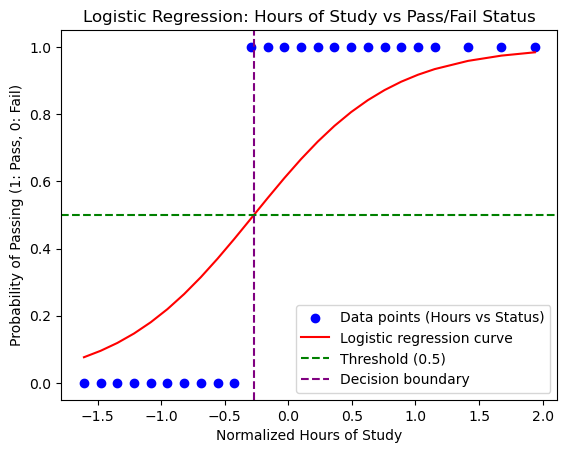

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('synthetic_study_data.csv')
X = data['Hours'].values
y = data['Status'].values

# Ensure the shape is correct
m = len(y)

# Normalize features (optional)
X = (X - np.mean(X)) / np.std(X)

# Sigmoid function (hypothesis for logistic regression)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hypothesis function for logistic regression
def hypothesis(X, theta):
    return sigmoid(theta[0] + theta[1] * X)

# Cost function for logistic regression (log-loss)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient descent function for logistic regression
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        predictions = hypothesis(X, theta)
        errors = predictions - y
        gradients = (1 / m) * np.array([np.sum(errors), np.sum(errors * X)])
        theta = theta - alpha * gradients
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Initializing parameters
alpha = 0.01  # Learning rate
num_iterations = 1000
initial_theta = np.zeros(2)  # Initial parameters [theta_0, theta_1]

# Calling gradient descent function
optimal_theta, cost_history = gradient_descent(X, y, initial_theta, alpha, num_iterations)

# Printing the results
print(f"Optimal parameters: θ_0 = {optimal_theta[0]}, θ_1 = {optimal_theta[1]}")
print(f"Final cost: {cost_history[-1]}")

# Sorting X values to ensure a smooth curve
X_sorted = np.sort(X)
y_predictions = hypothesis(X_sorted, optimal_theta)

# Plotting the dataset and the logistic regression curve
plt.scatter(X, y, color='blue', label='Data points (Hours vs Status)')
plt.plot(X_sorted, y_predictions, color='red', label='Logistic regression curve')

# Adding the dotted line at the threshold (0.5)
plt.axhline(y=0.5, color='green', linestyle='--', label='Threshold (0.5)')

# Calculating the decision boundary (where probability is 0.5)
decision_boundary = -optimal_theta[0] / optimal_theta[1]

# Adding the vertical line for the decision boundary
plt.axvline(x=decision_boundary, color='purple', linestyle='--', label='Decision boundary')

# Adding labels and title
plt.xlabel('Normalized Hours of Study')
plt.ylabel('Probability of Passing (1: Pass, 0: Fail)')
plt.title('Logistic Regression: Hours of Study vs Pass/Fail Status')
plt.legend()

# Show the plot
plt.show()